In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import interp1d

In [157]:
industrie_prices_without_VAT = pd.read_excel(r'/Users/shakhawathossainturag/Downloads/Energiepreisentwicklung.xlsx',sheet_name='5.8.3 Strom - € - Industrie', skiprows = 5, nrows = 26, index_col = 0)
industrie_prices_without_VAT = industrie_prices_without_VAT.iloc[:,0]
#household_prices_without_VAT.columns = ["year","price"]
industrie_prices_without_VAT = industrie_prices_without_VAT.reset_index()
industrie_prices_without_VAT.head()

,index,Unnamed: 1
0,1. HJ 2008,9.59
1,2. HJ 2008,9.57
2,1. HJ 2009,10.02
3,2. HJ 2009,10.07
4,1. HJ 2010,9.93


In [158]:

industrie_prices_without_VAT["index"]= industrie_prices_without_VAT["index"].str.slice(start = 5)
industrie_prices_without_VAT.columns = ["year","price"]


In [159]:
industrie_prices_without_VAT.head()

,year,price
0,2008,9.59
1,2008,9.57
2,2009,10.02
3,2009,10.07
4,2010,9.93


In [160]:
industrie_prices_without_VAT = industrie_prices_without_VAT.set_index("year")

industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
industrie_prices_without_VAT.index =  pd.to_datetime(industrie_prices_without_VAT.index, errors='ignore')
industrie_prices_without_VAT = industrie_prices_without_VAT.astype(float)
industrie_prices_without_VAT = industrie_prices_without_VAT.resample('12M').mean()
industrie_prices_without_VAT.index = industrie_prices_without_VAT.index.astype(str)
industrie_prices_without_VAT.head()

,price
year,
2008-01-31,9.580
2009-01-31,10.045
2010-01-31,10.255
2011-01-31,11.300
2012-01-31,11.570


In [161]:
industrie_prices_without_VAT.index= industrie_prices_without_VAT.index.str.slice(start = 0, stop = -6)
industrie_prices_without_VAT.head()

,price
year,
2008,9.580
2009,10.045
2010,10.255
2011,11.300
2012,11.570


In [162]:
industrie_prices_without_VAT = industrie_prices_without_VAT.reset_index()
industrie_prices_without_VAT

,year,price
0,2008,9.580
1,2009,10.045
2,2010,10.255
3,2011,11.300
4,2012,11.570
5,2013,12.755
6,2014,13.510
7,2015,13.080
8,2016,12.735
9,2017,12.690


In [163]:
#industrial 70000-150000 MWh
big_industrial_prices_BDEW = {'year': range(2008,2021), 'price': [8.56, 8.69, 8.63, 10.07, 9.26, 10.18, 10.48, 9.76, 8.37, 9.96, 8.96, 9.28, 10.07]}
big_industrial_prices_BDEW = pd.DataFrame(data=big_industrial_prices_BDEW)
# big_industrial_prices_BDEW = big_industrial_prices_BDEW.set_index("year")
big_industrial_prices_BDEW

,year,price
0,2008,8.56
1,2009,8.69
2,2010,8.63
3,2011,10.07
4,2012,9.26
5,2013,10.18
6,2014,10.48
7,2015,9.76
8,2016,8.37
9,2017,9.96


In [164]:
industrie_prices_without_VAT

,year,price
0,2008,9.580
1,2009,10.045
2,2010,10.255
3,2011,11.300
4,2012,11.570
5,2013,12.755
6,2014,13.510
7,2015,13.080
8,2016,12.735
9,2017,12.690


In [165]:
industrie_prices_without_VAT.dtypes

year      object
price    float64
dtype: object

In [166]:
df = industrie_prices_without_VAT.join(big_industrial_prices_BDEW, lsuffix='_small', rsuffix='_big')
df = df[["year_small","price_small","price_big"]]


In [167]:
df1 = df.set_index("year_small")
df1

,price_small,price_big
year_small,,
2008,9.580,8.56
2009,10.045,8.69
2010,10.255,8.63
2011,11.300,10.07
2012,11.570,9.26
2013,12.755,10.18
2014,13.510,10.48
2015,13.080,9.76
2016,12.735,8.37


In [168]:
# year = np.array(range(2008, 2021))
# price = np.array([21.72, 22.88, 24.07, 25.30, 26.36, 29.20, 29.78, 29.49, 29.73, 30.48, 29.94, 29.83, 30.25])

# f = interpolate.interp1d(year, price, fill_value = "extrapolate")


# p_2021 = f(2021)

# new_year = np.append(year, 2021)
# new_price = np.append(price, f(2021))

# plt.figure()
# plt.plot (new_year, new_price)
# plt.show()

In [169]:
df1

,price_small,price_big
year_small,,
2008,9.580,8.56
2009,10.045,8.69
2010,10.255,8.63
2011,11.300,10.07
2012,11.570,9.26
2013,12.755,10.18
2014,13.510,10.48
2015,13.080,9.76
2016,12.735,8.37


In [170]:
df1['price_mid'] = np.nan
df1 = df1[["price_small", "price_mid", "price_big"]]
df1

,price_small,price_mid,price_big
year_small,,,
2008,9.580,NaN,8.56
2009,10.045,NaN,8.69
2010,10.255,NaN,8.63
2011,11.300,NaN,10.07
2012,11.570,NaN,9.26
2013,12.755,NaN,10.18
2014,13.510,NaN,10.48
2015,13.080,NaN,9.76
2016,12.735,NaN,8.37


In [171]:

for i in range(len(df)):
    x = df1.iloc[i].interpolate(method ="linear")
    df1.price_mid[i] = x[1]
df1

/Users/shakhawathossainturag/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,price_small,price_mid,price_big
year_small,,,
2008,9.580,9.0700,8.56
2009,10.045,9.3675,8.69
2010,10.255,9.4425,8.63
2011,11.300,10.6850,10.07
2012,11.570,10.4150,9.26
2013,12.755,11.4675,10.18
2014,13.510,11.9950,10.48
2015,13.080,11.4200,9.76
2016,12.735,10.5525,8.37


In [172]:
x = df1["price_mid"]

In [174]:
x
x.to_excel("output.xlsx")

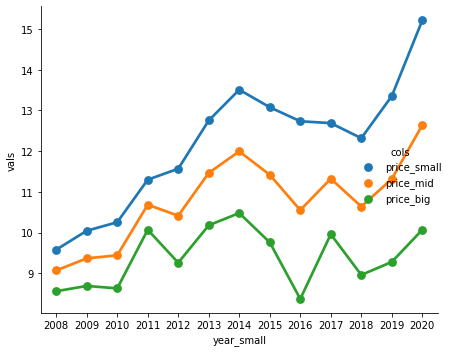

In [196]:
import pandas as pd
import seaborn as sns

plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
#ax = plt.gca()

df = df1
df

df = df.reset_index().melt('year_small', var_name='cols',  value_name='vals')
g = sns.catplot(x="year_small", y="vals", hue='cols', data=df, kind='point')



In [188]:
df

,year_small,price_small,price_big
0,2008,9.580,8.56
1,2009,10.045,8.69
2,2010,10.255,8.63
3,2011,11.300,10.07
4,2012,11.570,9.26
5,2013,12.755,10.18
6,2014,13.510,10.48
7,2015,13.080,9.76
8,2016,12.735,8.37
9,2017,12.690,9.96
